# IS-362 Final Project

## by Joe Chan

# Overview

** This is a presentation of the results of the IS-362 Project **

** This presentation was created from Jupyter Notebook Slides **

Description
-----------------------------------------------
The Final Project will analyze the data from the Student Performance Data Set found at:

**https://archive.ics.uci.edu/ml/datasets/student+performance**

The data set predicts student performance in secondary education (high school) in two schools in the country of Portugal.
The data set characteristics are Multivariate, the attribute characteristics are Integer, and the associated tasks are Classification and Regression.  The number of instances is 649 and the number of attributes is 33.  There are no missing values.  The data was donated on November 27, 2014. 

The data attributes include student grades (G1, G2, and G3), demographic, social, and school-related features.  The data was collected using school reports and questionaires.  The two datasets were provided for performance in the subjects of Mathematics and Portuguese language.  G3 is the final year grade and G1 and G2 cover the 1st and 2nd semester.  

The data set included two CSV files called **student-por.csv** and **student-mat.csv**

The final project will convert the two CSV files into Data Frames using two methods.  The student-por.csv will be read from a URL.  The student-mat.csv will be read in from a relational database using an SQL query. 

In [2]:
import numpy as np
import pandas as pd
from datetime import date
from pandas import DataFrame, Series
import sqlalchemy as sqla
import mysql.connector
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

#Create the por_df DataFrame from the student-por CSV file from the web
url = "https://raw.githubusercontent.com/jchan3/IS-362/master/student-por.csv"
por_df = pd.read_csv(url, delimiter=';')
#print (por_df.head())

#connect to Mysql database final_project
cnx = mysql.connector.connect(host='localhost',database='final_project',user='user2',password='temp')

#create sql query to collect data from the studentmat table in the RDBMS
sql = '''SELECT *
FROM studentmat'''

#convert the sql query results into the math_df DataFrame
math_df = pd.read_sql(sql, con=cnx)

#display the DataFrame results
#print (math_df.head())
#print (por_df.head())

#close the Mysql database connection
cnx.close()

A copy of the student data frame (por_df and math_df) is created with only 7 attributes and the 3 grade results.

In [3]:
#Analyze some of the student attributes 
#Create a new Data Frame copy
por_df2 = por_df[['sex','famsize','Pstatus','studytime','failures','famsup','absences','G1','G2','G3']].copy()
print (por_df2.head())
math_df2 = math_df[['sex','famsize','Pstatus','studytime','failures','famsup','absences','G1','G2','G3']].copy()
print (math_df2.head())

  sex famsize Pstatus  studytime  failures famsup  absences  G1  G2  G3
0   F     GT3       A          2         0     no         4   0  11  11
1   F     GT3       T          2         0    yes         2   9  11  11
2   F     LE3       T          2         0     no         6  12  13  12
3   F     GT3       T          3         0    yes         0  14  14  14
4   F     GT3       T          2         0    yes         0  11  13  13
  sex famsize Pstatus  studytime  failures famsup  absences  G1  G2  G3
0   F     GT3       A          2         0     no         6   5   6   6
1   F     GT3       T          2         0    yes         4   5   5   6
2   F     LE3       T          2         3     no        10   7   8  10
3   F     GT3       T          3         0    yes         2  15  14  15
4   F     GT3       T          2         0    yes         4   6  10  10


The values in the 4 columns are replaced from string values to numeric values.

In [4]:
#Transform the famsize and Pstatus columns from categories to numerical
#change the sex column
por_df2["sex"].replace(["F"], 1, inplace=True)
por_df2["sex"].replace(["M"], 0, inplace=True)
#change the Pstatus column
por_df2["Pstatus"].replace(["T"], 0, inplace=True)
por_df2["Pstatus"].replace(["A"], 1, inplace=True)
#change the famsize column
por_df2["famsize"].replace(["LE3"], 0, inplace=True)
por_df2["famsize"].replace(["GT3"], 1, inplace=True)
#change the famsup column
por_df2["famsup"].replace(["yes"], 1, inplace=True)
por_df2["famsup"].replace(["no"], 0, inplace=True)
#change the sex column
math_df2["sex"].replace(["F"], 1, inplace=True)
math_df2["sex"].replace(["M"], 0, inplace=True)
#change the Pstatus column
math_df2["Pstatus"].replace(["T"], 0, inplace=True)
math_df2["Pstatus"].replace(["A"], 1, inplace=True)
#change the famsize column
math_df2["famsize"].replace(["LE3"], 0, inplace=True)
math_df2["famsize"].replace(["GT3"], 1, inplace=True)
#change the famsup column
math_df2["famsup"].replace(["yes"], 1, inplace=True)
math_df2["famsup"].replace(["no"], 0, inplace=True)

print (por_df2.head())
print (math_df2.head())

   sex  famsize  Pstatus  studytime  failures  famsup  absences  G1  G2  G3
0    1        1        1          2         0       0         4   0  11  11
1    1        1        0          2         0       1         2   9  11  11
2    1        0        0          2         0       0         6  12  13  12
3    1        1        0          3         0       1         0  14  14  14
4    1        1        0          2         0       1         0  11  13  13
   sex  famsize  Pstatus  studytime  failures  famsup  absences  G1  G2  G3
0    1        1        1          2         0       0         6   5   6   6
1    1        1        0          2         0       1         4   5   5   6
2    1        0        0          2         3       0        10   7   8  10
3    1        1        0          3         0       1         2  15  14  15
4    1        1        0          2         0       1         4   6  10  10


The Average Grades for G1, G2, and G3 are calculated for the Portuguese and Math students.

In [5]:
#Get the Average Grades for G1, G2, G3
pG1avg = por_df2['G1'].mean()
pG2avg = por_df2['G2'].mean()
pG3avg = por_df2['G3'].mean()
print ("The average grade for Portuguese students in G1 is: ", pG1avg)
print ("The average grade for Portuguese students in G2 is: ", pG2avg)
print ("The average grade for Portuguese students in G3 is: ", pG3avg)
mG1avg = math_df2['G1'].mean()
mG2avg = math_df2['G2'].mean()
mG3avg = math_df2['G3'].mean()
print ("The average grade for Math students in G1 is: ", mG1avg)
print ("The average grade for Math students in G2 is: ", mG2avg)
print ("The average grade for Math students in G3 is: ", mG3avg)

The average grade for Portuguese students in G1 is:  11.399075500770415
The average grade for Portuguese students in G2 is:  11.570107858243452
The average grade for Portuguese students in G3 is:  11.906009244992296
The average grade for Math students in G1 is:  10.90886075949367
The average grade for Math students in G2 is:  10.713924050632912
The average grade for Math students in G3 is:  10.415189873417722


A seaborn pair plot chart is created with the x variables as "sex", "famsize", "Pstatus", "studytime", "failures", "famsup", and "absences", and the y variable as "G3"

A linear relationship between the plots is shown using the kind="reg" attribute.

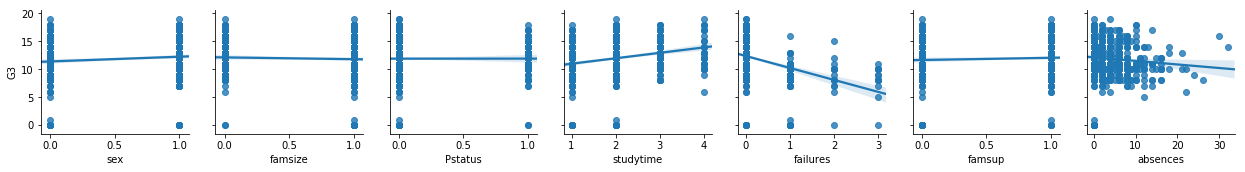

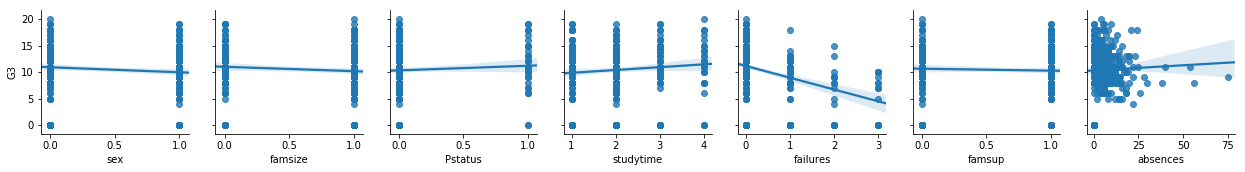

In [6]:
#Create seaborn visualization
sns.pairplot(por_df2, x_vars=['sex','famsize','Pstatus','studytime','failures','famsup','absences'], y_vars='G3', kind='reg')
sns.pairplot(math_df2, x_vars=['sex','famsize','Pstatus','studytime','failures','famsup','absences'], y_vars='G3', kind='reg')

A new predictor column is created with the 7 columns of 'sex','famsize','Pstatus','studytime','failures','famsup','absences'.

The "G3" variable serves as the y value.

The train and test data is created using the train_test_split function.

The linreg variable is created using the LinearRegression() function.

The linreg variable is fitted with the X_train and y_train data.

The y_pred variable is created for the y predictions using the predict function with the X-test values.

The margin of error is calculated using the metrics.mean_squared_error function.

The margin of error for the 7 columns (Portuguese students) is 3.2378694569843223

The margin of error for the 7 columns (Math students) is 3.9729490934424345

In [7]:
#Create new predictor columns
X = por_df2[['sex','famsize','Pstatus','studytime','failures','famsup','absences']]
y = por_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg = LinearRegression()
#Fit linear regression model to training data
linreg.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg.predict(X_test)
#Calculate margin of error
por_results = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 7 attributes on the Portuguese grades is: ", por_results)

(486, 7)
(163, 7)
(486,)
(163,)
The Margin of Error for the 7 attributes on the Portuguese grades is:  3.2378694569843223


In [8]:
#Create new predictor columns
X = math_df2[['sex','famsize','Pstatus','studytime','failures','famsup','absences']]
y = math_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg3 = LinearRegression()
#Fit linear regression model to training data
linreg3.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg3.predict(X_test)
#Calculate margin of error
math_results = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 7 attributes on the Math grades is: ", math_results)

(296, 7)
(99, 7)
(296,)
(99,)
The Margin of Error for the 7 attributes on the Math grades is:  3.9729490934424345


A new predictor column is created for the 4 columns of 'sex','studytime','failures','absences'.

The "G3" variable serves as the y value.

The margin of error for the 4 attributes (Portuguese students) is 3.2168719953981455

The margin of error for the 4 attributes (Math students) is 3.9094806035263794

In [9]:
#Create new predictor columns for 4 attributes: 'sex','studytime','failures','absences'
X = por_df2[['sex','studytime','failures','absences']]
y = por_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg2 = LinearRegression()
#Fit linear regression model to training data
linreg2.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg2.predict(X_test)
#Calculate margin of error
por_results2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 4 attributes on the Portuguese grades is: ", por_results2)

(486, 4)
(163, 4)
(486,)
(163,)
The Margin of Error for the 4 attributes on the Portuguese grades is:  3.2168719953981455


In [10]:
#Create new predictor columns for 4 attributes: 'sex','studytime','failures','absences'
X = math_df2[['sex','studytime','failures','absences']]
y = math_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg4 = LinearRegression()
#Fit linear regression model to training data
linreg4.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg4.predict(X_test)
#Calculate margin of error
math_results2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 4 attributes on the Math grades is: ", math_results2)

(296, 4)
(99, 4)
(296,)
(99,)
The Margin of Error for the 4 attributes on the Math grades is:  3.9094806035263794


The GroupBy function was then used to analyze the average grades by the different sexes for both the Portuguese students and Math students. 

In [12]:
#Find the Average Grades by different groups
por_df3 = por_df2[['sex','G1','G2','G3']].copy()
print (por_df3.head())
math_df3 = math_df2[['sex','G1','G2','G3']].copy()
print (math_df3.head())

print ("The G1 average for Male (0) and Female (1) Portuguese students is: ")
print (por_df3.groupby('sex').G1.mean())

print ("The G2 average for Male (0) and Female (1) Portuguese students is: ")
print (por_df3.groupby('sex').G2.mean())

print ("The G3 average for Male (0) and Female (1) Portuguese students is: ")
print (por_df3.groupby('sex').G3.mean())


   sex  G1  G2  G3
0    1   0  11  11
1    1   9  11  11
2    1  12  13  12
3    1  14  14  14
4    1  11  13  13
   sex  G1  G2  G3
0    1   5   6   6
1    1   5   5   6
2    1   7   8  10
3    1  15  14  15
4    1   6  10  10
The G1 average for Male (0) and Female (1) Portuguese students is: 
sex
0    11.056391
1    11.637076
Name: G1, dtype: float64
The G2 average for Male (0) and Female (1) Portuguese students is: 
sex
0    11.206767
1    11.822454
Name: G2, dtype: float64
The G3 average for Male (0) and Female (1) Portuguese students is: 
sex
0    11.406015
1    12.253264
Name: G3, dtype: float64


In [13]:
print ("The G1 average for Male (0) and Female (1) Math students is: ")
print (math_df3.groupby('sex').G1.mean())

print ("The G2 average for Male (0) and Female (1) Math students is: ")
print (math_df3.groupby('sex').G2.mean())

print ("The G3 average for Male (0) and Female (1) Math students is: ")
print (math_df3.groupby('sex').G3.mean())

The G1 average for Male (0) and Female (1) Math students is: 
sex
0    11.229947
1    10.620192
Name: G1, dtype: float64
The G2 average for Male (0) and Female (1) Math students is: 
sex
0    11.074866
1    10.389423
Name: G2, dtype: float64
The G3 average for Male (0) and Female (1) Math students is: 
sex
0    10.914439
1     9.966346
Name: G3, dtype: float64


## Conclusion:
Based on the margin of error results and graphical validation, the 4 attributes ('sex','studytime','failures','absences'), are better indicators of the G1, G2 and G3 grades than 3 attributes ('famsize','Pstatus','famsup').

As the graphs show, 'studytime' and 'failures' are the strongest indicators of the grades.

The GroupBy function was used to calculate the grade averages by sex and Male students were found to have lower grades in Portuguese than Female students.

However, for the Math grades, Male students, on average, had higher grades than Female students.

  sex famsize Pstatus  studytime  failures famsup  absences  G1  G2  G3
0   F     GT3       A          2         0     no         4   0  11  11
1   F     GT3       T          2         0    yes         2   9  11  11
2   F     LE3       T          2         0     no         6  12  13  12
3   F     GT3       T          3         0    yes         0  14  14  14
4   F     GT3       T          2         0    yes         0  11  13  13
  sex famsize Pstatus  studytime  failures famsup  absences  G1  G2  G3
0   F     GT3       A          2         0     no         6   5   6   6
1   F     GT3       T          2         0    yes         4   5   5   6
2   F     LE3       T          2         3     no        10   7   8  10
3   F     GT3       T          3         0    yes         2  15  14  15
4   F     GT3       T          2         0    yes         4   6  10  10
   sex  famsize  Pstatus  studytime  failures  famsup  absences  G1  G2  G3
0    1        1        1          2         0       0       

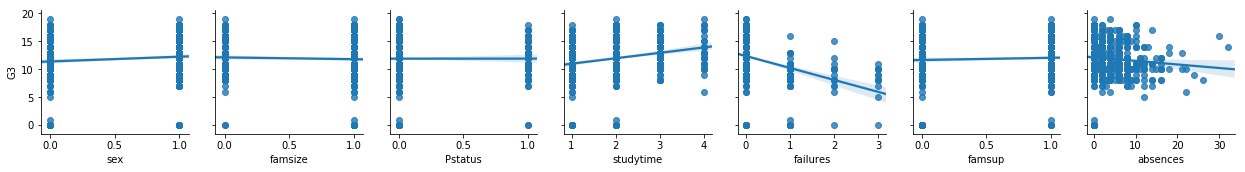

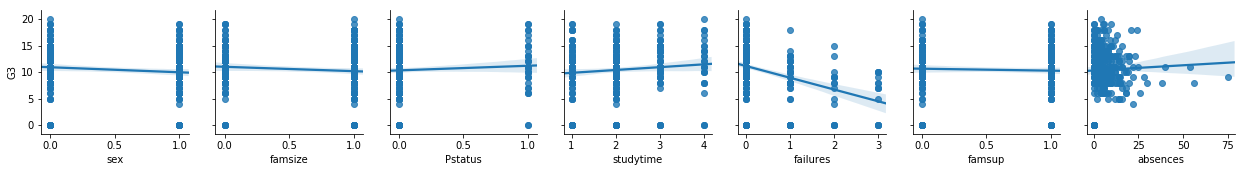

In [26]:
import numpy as np
import pandas as pd
from datetime import date
from pandas import DataFrame, Series
import sqlalchemy as sqla
import mysql.connector
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

#Create the por_df DataFrame from the student-por CSV file from the web
url = "https://raw.githubusercontent.com/jchan3/IS-362/master/student-por.csv"
por_df = pd.read_csv(url, delimiter=';')
#print (por_df.head())

#connect to Mysql database final_project
cnx = mysql.connector.connect(host='localhost',database='final_project',user='user2',password='temp')

#create sql query to collect data from the studentmat table in the RDBMS
sql = '''SELECT *
FROM studentmat'''

#convert the sql query results into the math_df DataFrame
math_df = pd.read_sql(sql, con=cnx)
#por_df = pd.read_sql(sql2, con=cnx)

#display the DataFrame results
#print (math_df.head())
#print (por_df.head())

#close the Mysql database connection
cnx.close()

#Analyze some of the student attributes 
#Create a new Data Frame copy
por_df2 = por_df[['sex','famsize','Pstatus','studytime','failures','famsup','absences','G1','G2','G3']].copy()
print (por_df2.head())
math_df2 = math_df[['sex','famsize','Pstatus','studytime','failures','famsup','absences','G1','G2','G3']].copy()
print (math_df2.head())

#Transform the famsize and Pstatus columns from categories to numerical
#change the sex column
por_df2["sex"].replace(["F"], 1, inplace=True)
por_df2["sex"].replace(["M"], 0, inplace=True)
#change the Pstatus column
por_df2["Pstatus"].replace(["T"], 0, inplace=True)
por_df2["Pstatus"].replace(["A"], 1, inplace=True)
#change the famsize column
por_df2["famsize"].replace(["LE3"], 0, inplace=True)
por_df2["famsize"].replace(["GT3"], 1, inplace=True)
#change the famsup column
por_df2["famsup"].replace(["yes"], 1, inplace=True)
por_df2["famsup"].replace(["no"], 0, inplace=True)
#change the sex column
math_df2["sex"].replace(["F"], 1, inplace=True)
math_df2["sex"].replace(["M"], 0, inplace=True)
#change the Pstatus column
math_df2["Pstatus"].replace(["T"], 0, inplace=True)
math_df2["Pstatus"].replace(["A"], 1, inplace=True)
#change the famsize column
math_df2["famsize"].replace(["LE3"], 0, inplace=True)
math_df2["famsize"].replace(["GT3"], 1, inplace=True)
#change the famsup column
math_df2["famsup"].replace(["yes"], 1, inplace=True)
math_df2["famsup"].replace(["no"], 0, inplace=True)

print (por_df2.head())
print (math_df2.head())

#Get the Average Grades for G1, G2, G3
pG1avg = por_df2['G1'].mean()
pG2avg = por_df2['G2'].mean()
pG3avg = por_df2['G3'].mean()
print ("The average grade for Portuguese students in G1 is: ", pG1avg)
print ("The average grade for Portuguese students in G2 is: ", pG2avg)
print ("The average grade for Portuguese students in G3 is: ", pG3avg)
mG1avg = math_df2['G1'].mean()
mG2avg = math_df2['G2'].mean()
mG3avg = math_df2['G3'].mean()
print ("The average grade for Math students in G1 is: ", mG1avg)
print ("The average grade for Math students in G2 is: ", mG2avg)
print ("The average grade for Math students in G3 is: ", mG3avg)

#Create seaborn visualization
sns.pairplot(por_df2, x_vars=['sex','famsize','Pstatus','studytime','failures','famsup','absences'], y_vars='G3', kind='reg')
sns.pairplot(math_df2, x_vars=['sex','famsize','Pstatus','studytime','failures','famsup','absences'], y_vars='G3', kind='reg')

#Create new predictor columns
X = por_df2[['sex','famsize','Pstatus','studytime','failures','famsup','absences']]
y = por_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg = LinearRegression()
#Fit linear regression model to training data
linreg.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg.predict(X_test)
#Calculate margin of error
por_results = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 7 attributes on the Portuguese grades is: ", por_results)

#Create new predictor columns for 4 attributes: 'sex','studytime','failures','absences'
X = por_df2[['sex','studytime','failures','absences']]
y = por_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg2 = LinearRegression()
#Fit linear regression model to training data
linreg2.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg2.predict(X_test)
#Calculate margin of error
por_results2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 4 attributes on the Portuguese grades is: ", por_results2)

#Create new predictor columns
X = math_df2[['sex','famsize','Pstatus','studytime','failures','famsup','absences']]
y = math_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg3 = LinearRegression()
#Fit linear regression model to training data
linreg3.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg3.predict(X_test)
#Calculate margin of error
math_results = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 7 attributes on the Math grades is: ", math_results)

#Create new predictor columns for 4 attributes: 'sex','studytime','failures','absences'
X = math_df2[['sex','studytime','failures','absences']]
y = math_df2['G3']
#Create test data with default setting of 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
#Create linear regression model
linreg4 = LinearRegression()
#Fit linear regression model to training data
linreg4.fit(X_train, y_train)
#Test the model to the test data
y_pred = linreg4.predict(X_test)
#Calculate margin of error
math_results2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print ("The Margin of Error for the 4 attributes on the Math grades is: ", math_results2)

#Find the Average Grades by different groups
por_df3 = por_df2[['sex','G1','G2','G3']].copy()
print (por_df3.head())
math_df3 = math_df2[['sex','G1','G2','G3']].copy()
print (math_df3.head())

print ("The G1 average for Male (0) and Female (1) Portuguese students is: ")
print (por_df3.groupby('sex').G1.mean())

print ("The G2 average for Male (0) and Female (1) Portuguese students is: ")
print (por_df3.groupby('sex').G2.mean())

print ("The G3 average for Male (0) and Female (1) Portuguese students is: ")
print (por_df3.groupby('sex').G3.mean())

print ("The G1 average for Male (0) and Female (1) Math students is: ")
print (math_df3.groupby('sex').G1.mean())

print ("The G2 average for Male (0) and Female (1) Math students is: ")
print (math_df3.groupby('sex').G2.mean())

print ("The G3 average for Male (0) and Female (1) Math students is: ")
print (math_df3.groupby('sex').G3.mean())
